## 初步认识CNN网络

In [1]:
# 导入依赖包
import torch
import torch.nn.functional as F
from torchvision import transforms
from torchvision import datasets
from torch.utils.data import DataLoader
import torch.optim as optim

In [2]:
# 设置基本参数
# 每个卷积核的通道数量等于输入通道的数量
# 卷积核的总数和输出通道的数量保持一致 一般情况下使用奇数
in_channels, out_channels= 5, 10
width, height = 100, 100
# 卷积核的宽和高 也可以是元组
kernel_size = 3
batch_size = 1

In [3]:
# 创建基本输入
input = torch.randn(batch_size,
    in_channels,
    width, 
    height)

In [4]:
# 创建一层网络
conv_layer = torch.nn.Conv2d(in_channels,
    out_channels,
    kernel_size=kernel_size)

In [5]:
# 计算
output = conv_layer(input)

In [6]:
print(input.shape)
print(output.shape)
print(conv_layer.weight.shape)


torch.Size([1, 5, 100, 100])
torch.Size([1, 10, 98, 98])
torch.Size([10, 5, 3, 3])


## 使用padding 和 步长 对卷积层进行处理


In [18]:
# 初始数据
input2 = [3,4,6,5,7,2,4,6,8,2,1,6,7,8,4,9,7,4,6,2,3,7,5,4,1]

In [19]:
# 调整数据维度
input2 = torch.Tensor(input2).view(1, 1, 5, 5)

In [20]:
# 对卷积网络增加padding
conv_layer_pad = torch.nn.Conv2d(1, 1, kernel_size=3, padding=1, bias=False)

In [21]:
# 为了方便查看计算结果，手动设置卷积核
kernel = torch.Tensor([1,2,3,4,5,6,7,8,9]).view(1, 1, 3, 3)
conv_layer_pad.weight.data = kernel.data

In [22]:
output2 = conv_layer_pad(input2)

In [23]:
output2

tensor([[[[ 91., 168., 224., 215., 127.],
          [114., 211., 295., 262., 149.],
          [192., 259., 282., 214., 122.],
          [194., 251., 253., 169.,  86.],
          [ 96., 112., 110.,  68.,  31.]]]], grad_fn=<ThnnConv2DBackward>)

In [25]:
# 设置步长和内核
conv_layer_3 = torch.nn.Conv2d(1, 1, kernel_size=3, stride=2, bias=False)
kernel = torch.Tensor([1,2,3,4,5,6,7,8,9]).view(1, 1, 3, 3)
conv_layer_3.weight.data = kernel.data


In [28]:
output3 = conv_layer_3(input2)
print(output3)

tensor([[[[211., 262.],
          [251., 169.]]]], grad_fn=<ThnnConv2DBackward>)


## 搭建CNN的网络模型识别手写数字

In [2]:
# 搭建基本的cnn网络
class CnnNet(torch.nn.Module):
    def __init__(self):
      super(CnnNet,self).__init__()
      # 两层卷积网络 1*28*28
      self.conv1 = torch.nn.Conv2d(1,10,kernel_size=5)
            
      self.conv2 = torch.nn.Conv2d(10,20,kernel_size=5)
      # 增加最大池化层 
      self.pooling = torch.nn.MaxPool2d(2)
      # 320 = 20*4*4
      self.fc = torch.nn.Linear(320,10)
    def forward(self, x):
        # 首先拿到batch_size
        batch_size = x.size(0)
        # 开始前向传播 第一层卷积 + relu激活 + pool池化
        x = F.relu(self.pooling(self.conv1(x)))
        # 第二层卷积 + relu激活 + pool池化
        x = F.relu(self.pooling(self.conv2(x)))
        # 对数据进行展平
        x = x.view(batch_size, -1) 
        # 使用全连接进行预测
        x = self.fc(x)
        return x

In [3]:
# 实例化模型
model = CnnNet()
# 判断当前设备是不是用cuda
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [52]:
# 模型训练函数
def train(epoch):
    running_loss = 0.0
    for batch_idx, data in enumerate(train_loader, 0):
        inputs, target = data    
        optimizer.zero_grad()
        # forward + backward + update
        outputs = model(inputs)
        loss = criterion(outputs, target)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if batch_idx % 300 == 299:
            print('[%d, %5d] loss: %.3f' % (epoch + 1, batch_idx + 1, running_loss / 2000))
            running_loss = 0.0


In [5]:
def test():
    correct = 0
    total = 0
    with torch.no_grad():
        for data in test_loader:
            inputs, target = data
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, dim=1)
            total += target.size(0)
            correct += (predicted == target).sum().item()
        print('Accuracy on test set: %d %% [%d/%d]' % (100 * correct / total, correct, total))

In [6]:
batch_size = 64
transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.1307, ), (0.3081, ))])
train_dataset = datasets.MNIST(root='../dataset/mnist/',train=True,download=True,transform=transform)
train_loader = DataLoader(train_dataset,shuffle=True,batch_size=batch_size)
test_dataset = datasets.MNIST(root='../dataset/mnist/',train=False,download=True,transform=transform)
test_loader = DataLoader(test_dataset,shuffle=False,batch_size=batch_size)


In [7]:
criterion = torch.nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.5)

tensor([[[[-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          ...,
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242]]],


        [[[-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          ...,
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242]]],


        [[[-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.424

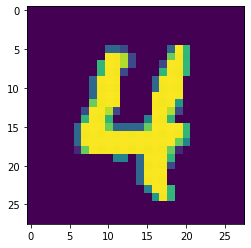

KeyboardInterrupt: Interrupted by user

In [28]:
if __name__ == '__main__':
    for epoch in range(10):
        train(epoch)
        test()

In [49]:
# 读取图像
import cv2
spect= cv2.imread('pic/1.png') # BGR
spect= spect[:, :, ::-1] # RGB
# RGB转化为单通道图像
lenna_gray = torch.randn(28,28)
for r in range(28):
    for l in range(28):
        lenna_gray[r, l] = (0.11 * spect[r, l, 0] + 0.59 * spect[r, l, 1] + 0.3 * spect[r, l, 2])/255*(-1)+0.5
# 28*28 -> 1*1*28*28
input_pic = lenna_gray.unsqueeze(0).unsqueeze(0)

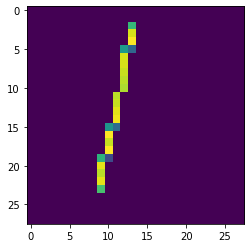

In [50]:
# 展示图像
import matplotlib.pyplot as plt
plt.imshow(input_pic[0][0])
plt.show()

In [51]:
# 利用模型进行预测
outputs = model(input_pic)

_, predicted = torch.max(outputs.data, dim=1)
print ('图像的预测值为：', predicted.item())

图像的预测值为： 1
